# Importing the Necessary Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

# Taking the datasets as input

In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/Data Mining Project Component/Datasets/googleplaystore.csv")
data2 = pd.read_csv("/content/drive/MyDrive/Data Mining Project Component/Datasets/googleplaystore_user_reviews.csv")

In [ ]:
data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Taking care of missing values

In [ ]:
data1.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
data1_1 = data1.dropna()

In [ ]:
data1_1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Now, the dataset has no missing values

In [ ]:
data1_1.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
data1_1.describe() #the description is regarding the rating column as it is the only numerical column here

,Rating
count,9360.000000
mean,4.191838
std,0.515263
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


# The Dataset has many columns that are not having proper numerical contents and they cannot be worked on directly. We will map them to normal numbers so that we are free to work with them.

# Data Cleaning

In [ ]:
data1_1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data1_1['Installs'] = data1_1['Installs'].map(lambda x: x.rstrip('+'))

<ipython-input-128-b81741e21d9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_1['Installs'] = data1_1['Installs'].map(lambda x: x.rstrip('+'))


In [ ]:
data1_1['Installs'] = pd.to_numeric(data1_1['Installs'].str.replace(',',''))

<ipython-input-129-72ad1ae10485>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_1['Installs'] = pd.to_numeric(data1_1['Installs'].str.replace(',',''))


In [ ]:
data1_1['Price'] = pd.to_numeric(data1_1['Price'].str.replace('$',''))

<ipython-input-130-303564ef37c2>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data1_1['Price'] = pd.to_numeric(data1_1['Price'].str.replace('$',''))
<ipython-input-130-303564ef37c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_1['Price'] = pd.to_numeric(data1_1['Price'].str.replace('$',''))


In [ ]:
data1_1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data1_1.var()

<ipython-input-132-b8e6293d39a7>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1_1.var()


Rating      2.654959e-01
Installs    8.329549e+15
Price       2.503243e+02
dtype: float64

In [ ]:
data1_1['Installs with Log'] = np.log(data1_1["Installs"])

<ipython-input-133-250f173b120b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_1['Installs with Log'] = np.log(data1_1["Installs"])


In [ ]:
data1_1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs with Log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,9.210340
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,13.122363
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,15.424948
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,17.727534
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,11.512925


In [ ]:
data1_1.var() #Now, the variance of Installs column has been normalized

<ipython-input-135-c7cd7bcbe93c>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1_1.var() #Now, the variance of Installs column has been normalized


Rating               2.654959e-01
Installs             8.329549e+15
Price                2.503243e+02
Installs with Log    1.475847e+01
dtype: float64

In [ ]:
data1_1["App"].duplicated().sum()

1170

In [ ]:
data1_1.drop_duplicates(inplace = True)

<ipython-input-137-738895c7e2af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_1.drop_duplicates(inplace = True)


In [ ]:
data1_1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs with Log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,9.210340
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,13.122363
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,15.424948
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,17.727534
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,11.512925


In [ ]:
data1_1.duplicated().sum()

0

In [ ]:
data1_1['Reviews'] = pd.to_numeric(data1_1['Reviews'].str.replace('$',''))

<ipython-input-140-f07ee014e66a>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data1_1['Reviews'] = pd.to_numeric(data1_1['Reviews'].str.replace('$',''))
<ipython-input-140-f07ee014e66a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_1['Reviews'] = pd.to_numeric(data1_1['Reviews'].str.replace('$',''))


In [ ]:
data1_1 = data1_1.loc[data1_1.groupby(['App'])['Reviews'].idxmax()]

In [ ]:
data1_1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs with Log
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,1000000,Free,0.0,Everyone,Social,"August 2, 2018",5.03,4.1 and up,13.815511
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,10000,Free,0.0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,9.210340
4541,.R,TOOLS,4.5,259,203k,10000,Free,0.0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,9.210340
4636,/u/app,COMMUNICATION,4.7,573,53M,10000,Free,0.0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,9.210340
5940,058.ba,NEWS_AND_MAGAZINES,4.4,27,14M,100,Free,0.0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up,4.605170


# Plotting Starts 👽

In [ ]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10, 6)

# What are the top 20 apps in the Google Play Store organised by genre?

In [ ]:
best_gen = data1_1.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})
install_no = data1_1.groupby(['Genres'])[['Installs']].sum()
final_install = pd.merge(best_gen, install_no, on='Genres')
install_20 = final_install.head(20)

In [ ]:
install_20

,Genres,Count,Installs
0,Tools,718,8090224500
1,Entertainment,471,3014624820
2,Education,429,262767210
3,Finance,302,455312400
4,Productivity,301,5793070180
5,Lifestyle,300,493741120
6,Personalization,296,1532341930
7,Action,292,3483037470
8,Medical,290,38252576
9,Sports,266,1412431465


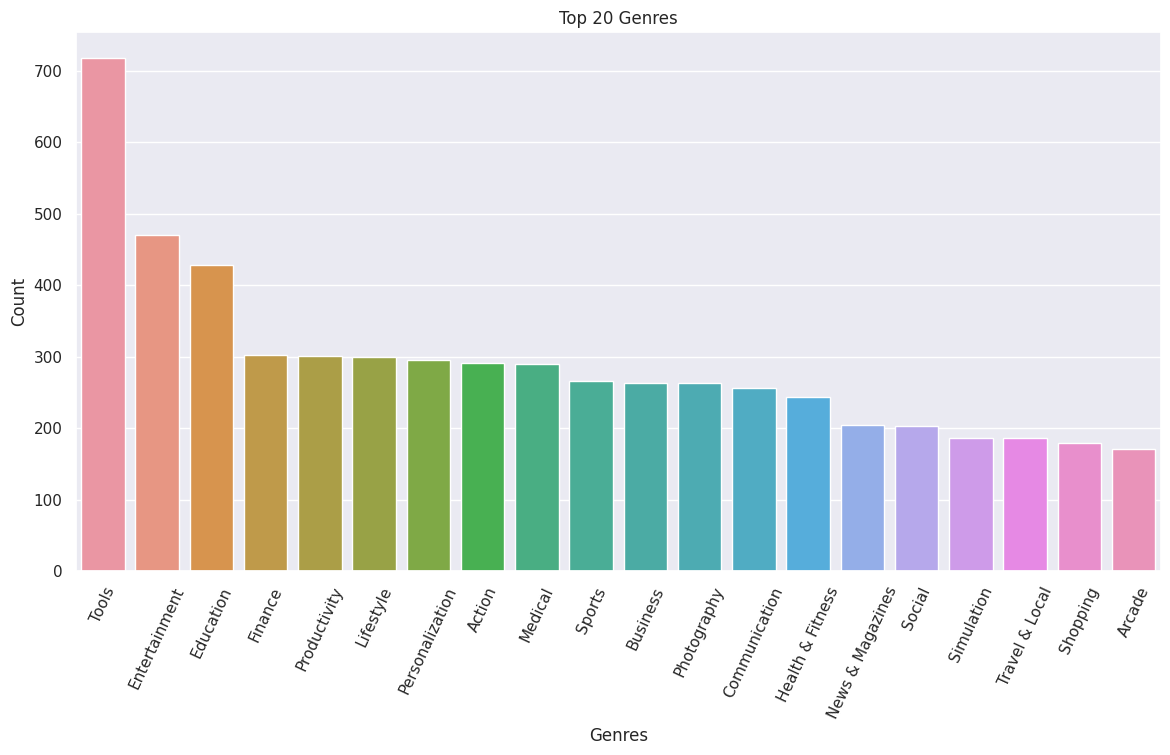

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Number of Application")
plt.title("Top 20 Genres")
sns.barplot(x = install_20.Genres, y = install_20.Count)
plt.show()

# What are the most popular Genres among the top 20 Genres?

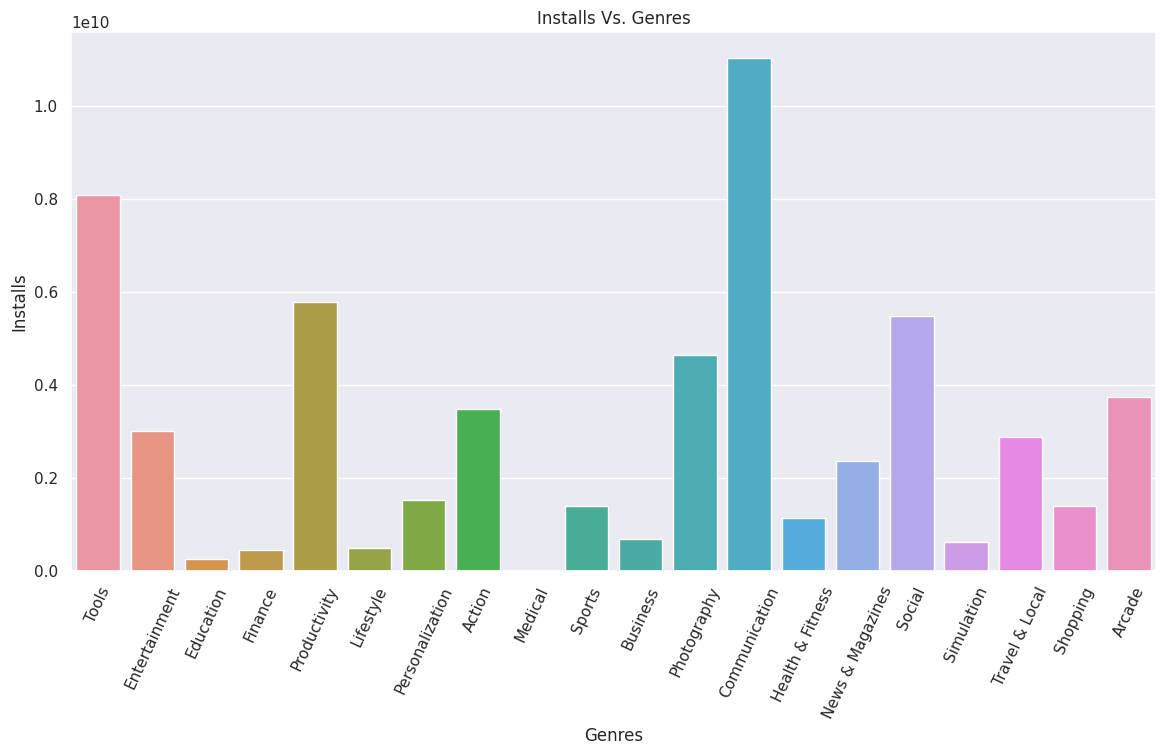

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs Vs. Genres")
sns.barplot(x = install_20.Genres, y = install_20.Installs)
plt.show()

**As the following two graphs demonstrate: Although the majority of apps in the Google Play Store fall under the Tools, Entertainment, and Education categories, the situation is not the same in terms of installation and demand in the market. Communication, Tools, and Productivity are the genres with the most apps installed.**

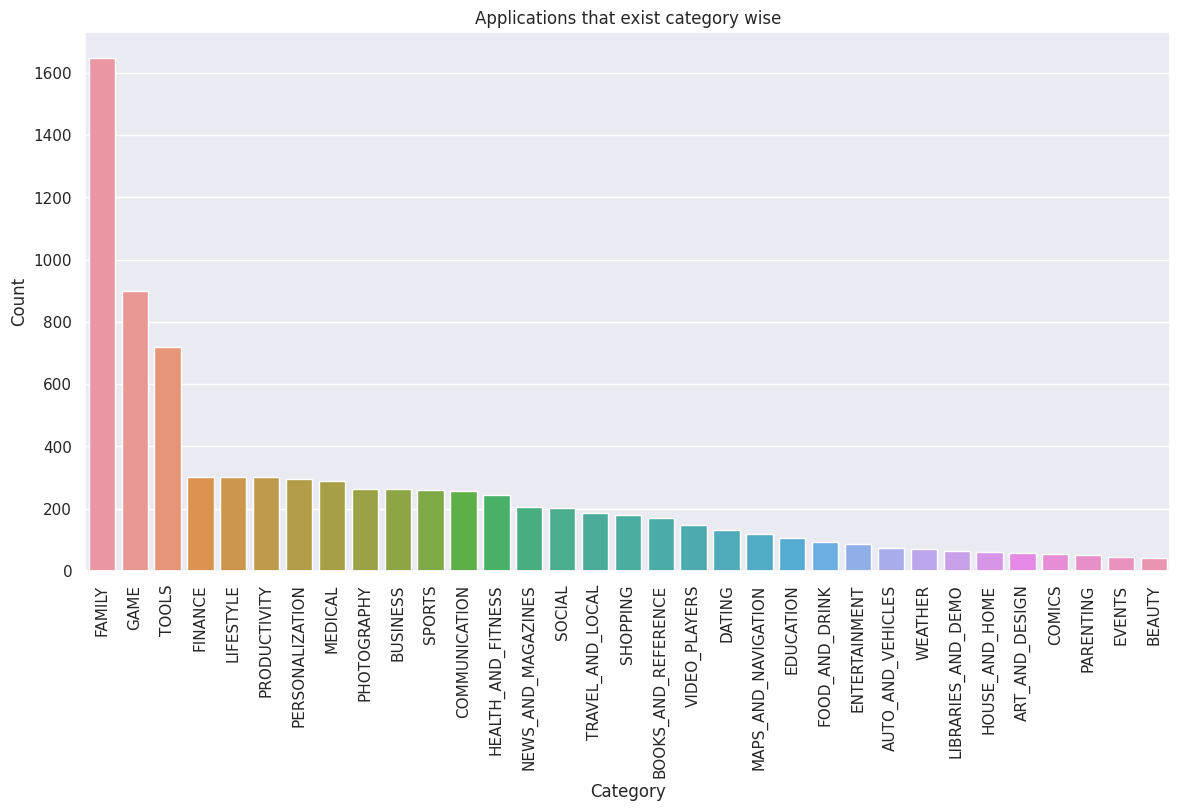

In [ ]:
best_cat = data1_1.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})
cat_install = data1_1.groupby(['Category'])[['Installs']].sum()
best_cat_install = pd.merge(best_cat, cat_install, on='Category')
best_20_cat_install = best_cat_install
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of application")
plt.title("Applications that exist category wise")
sns.barplot(x = best_20_cat_install.Category, y = best_20_cat_install.Count)
plt.show()

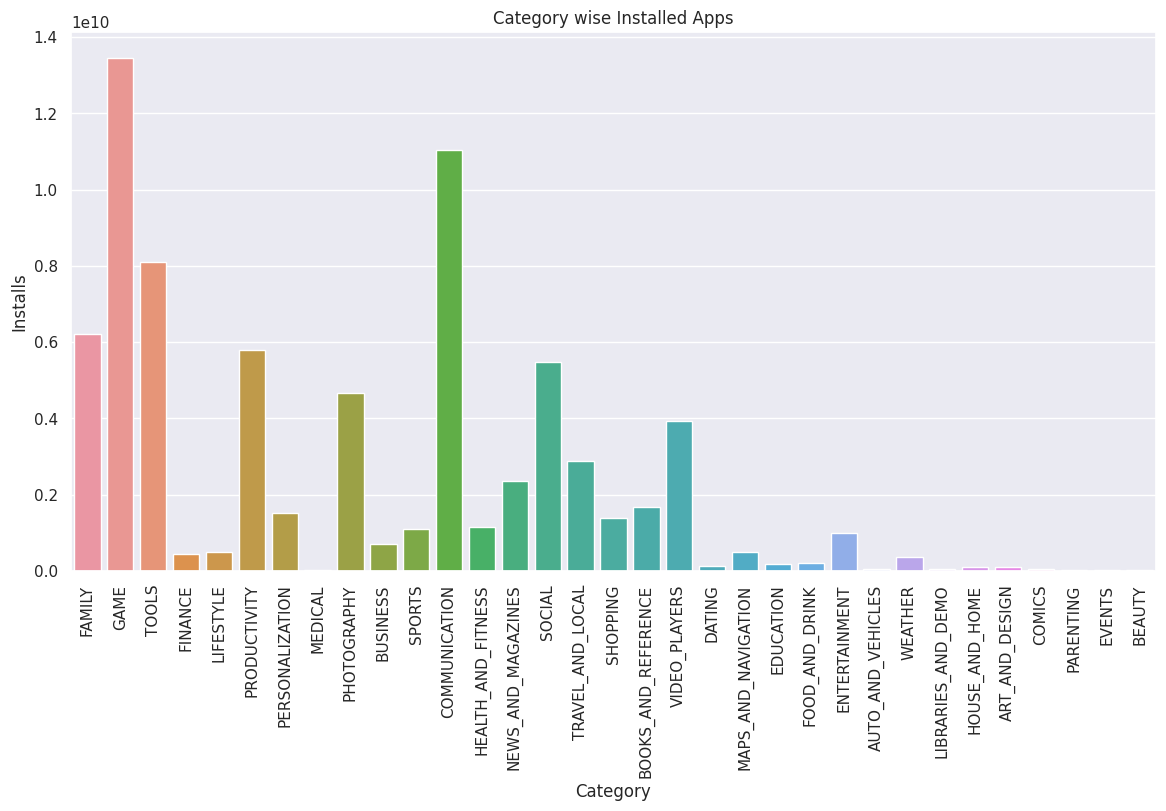

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Category wise Installed Apps")
sns.barplot(x = best_20_cat_install.Category, y = best_20_cat_install.Installs)
plt.show()

**As may be seen from the two graphs above: The majority of apps in the Google Play Store are in the Family, Games, and Tools categories, however the scenario is not the same in terms of installation and demand in the market. Games, Communication, and Tools have the most installed apps.**

In [ ]:
average_rating_of_apps = data1_1.groupby(['Genres'])[['Rating']].mean()

In [ ]:
ratings_of_genres = pd.merge(best_gen, average_rating_of_apps, on='Genres')

<ipython-input-152-7bf8537f2cf2>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ratings_of_genres.Rating, color="Red", shade = True)


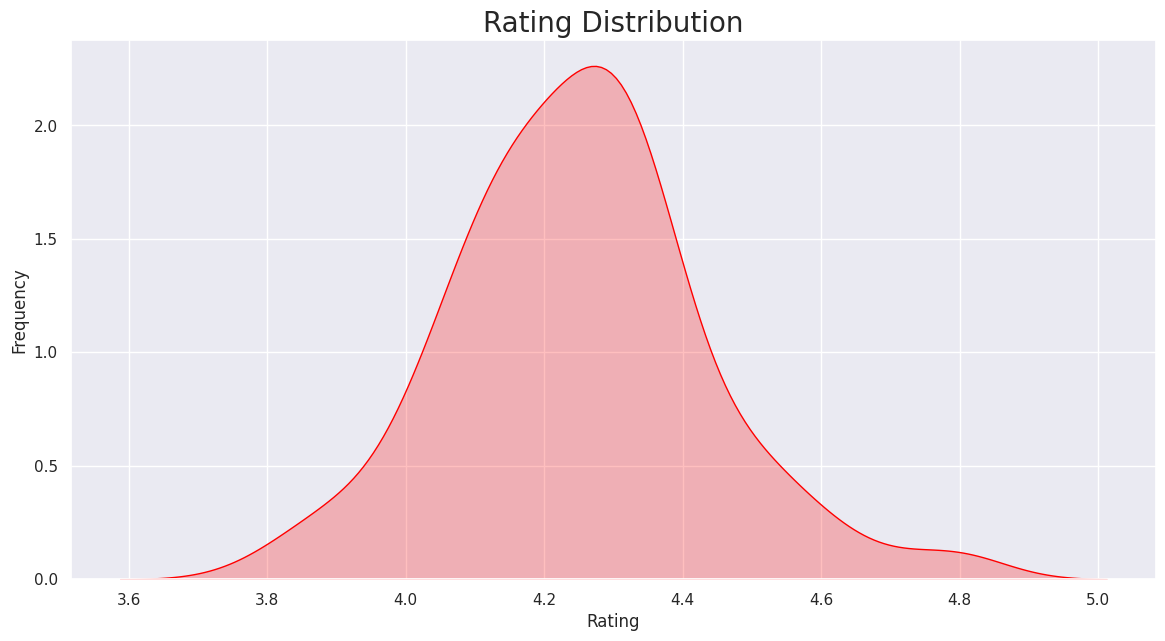

In [ ]:
plt.figure(figsize=(14,7))
g = sns.kdeplot(ratings_of_genres.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Rating Distribution',size = 20)
plt.show()

# Highest and Lowest Performing Genres

In [ ]:
ratings_of_genres.sort_values('Rating', ascending =False, inplace=True)

In [ ]:
high_rating_gen = ratings_of_genres.iloc[0:20]
low_rating_gen = ratings_of_genres.iloc[-20:]
low_rating_gen = low_rating_gen[low_rating_gen['Rating'].notnull()]

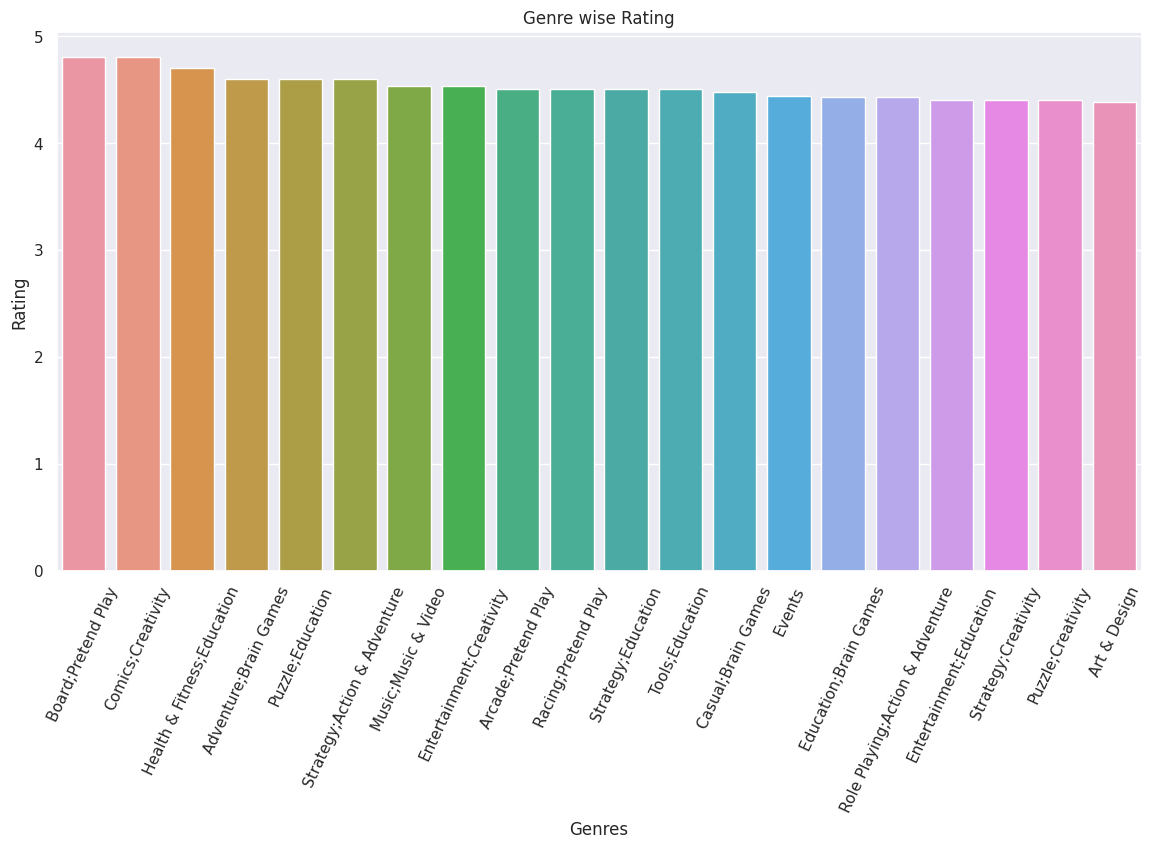

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Genre wise Rating")
sns.barplot(x = high_rating_gen.Genres, y = high_rating_gen.Rating)
plt.show()

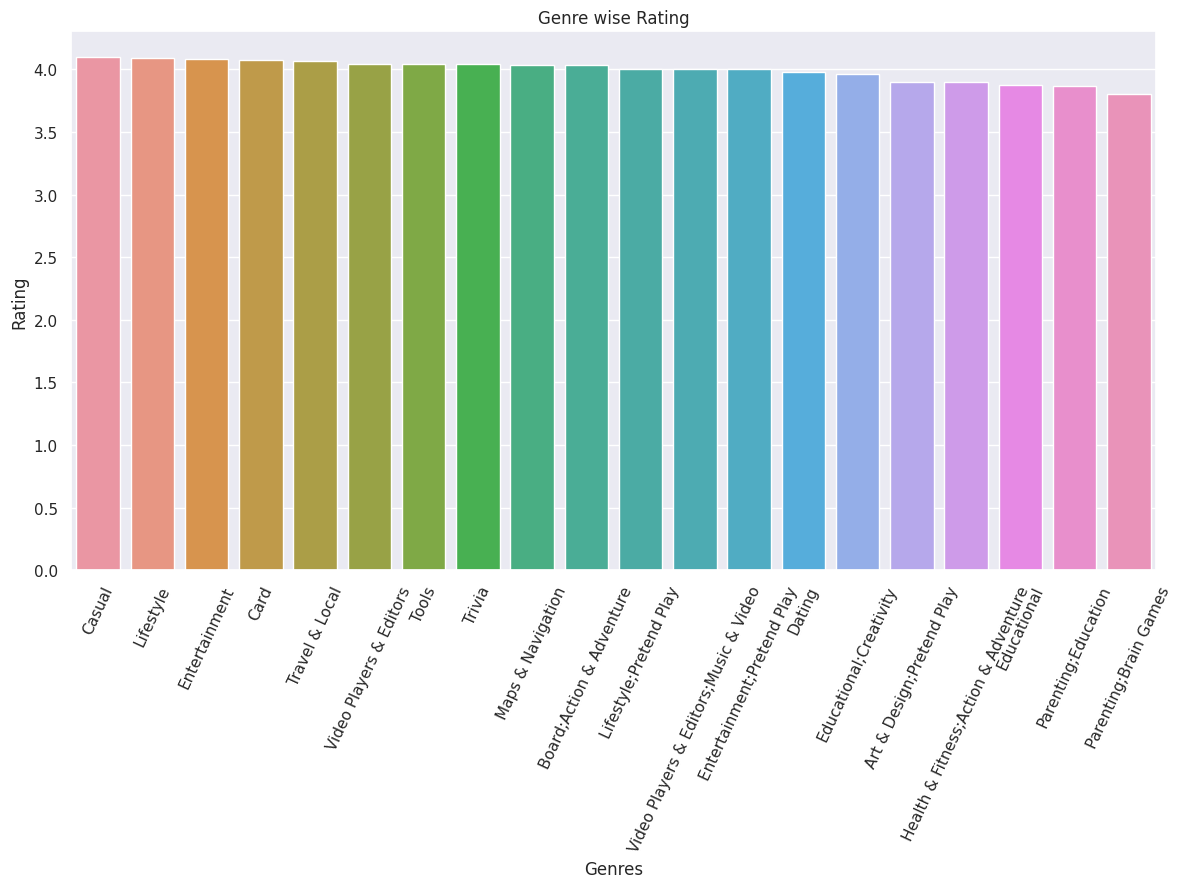

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Genre wise Rating")
sns.barplot(x = low_rating_gen.Genres, y = low_rating_gen.Rating)
plt.show()

# What are the count of applications in each category differentiated by their type?


<ipython-input-157-49b21a566b88>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  count_of_apps_data1_1 = count_of_apps.pivot('Category', 'Type', 'Count').fillna(0).reset_index()


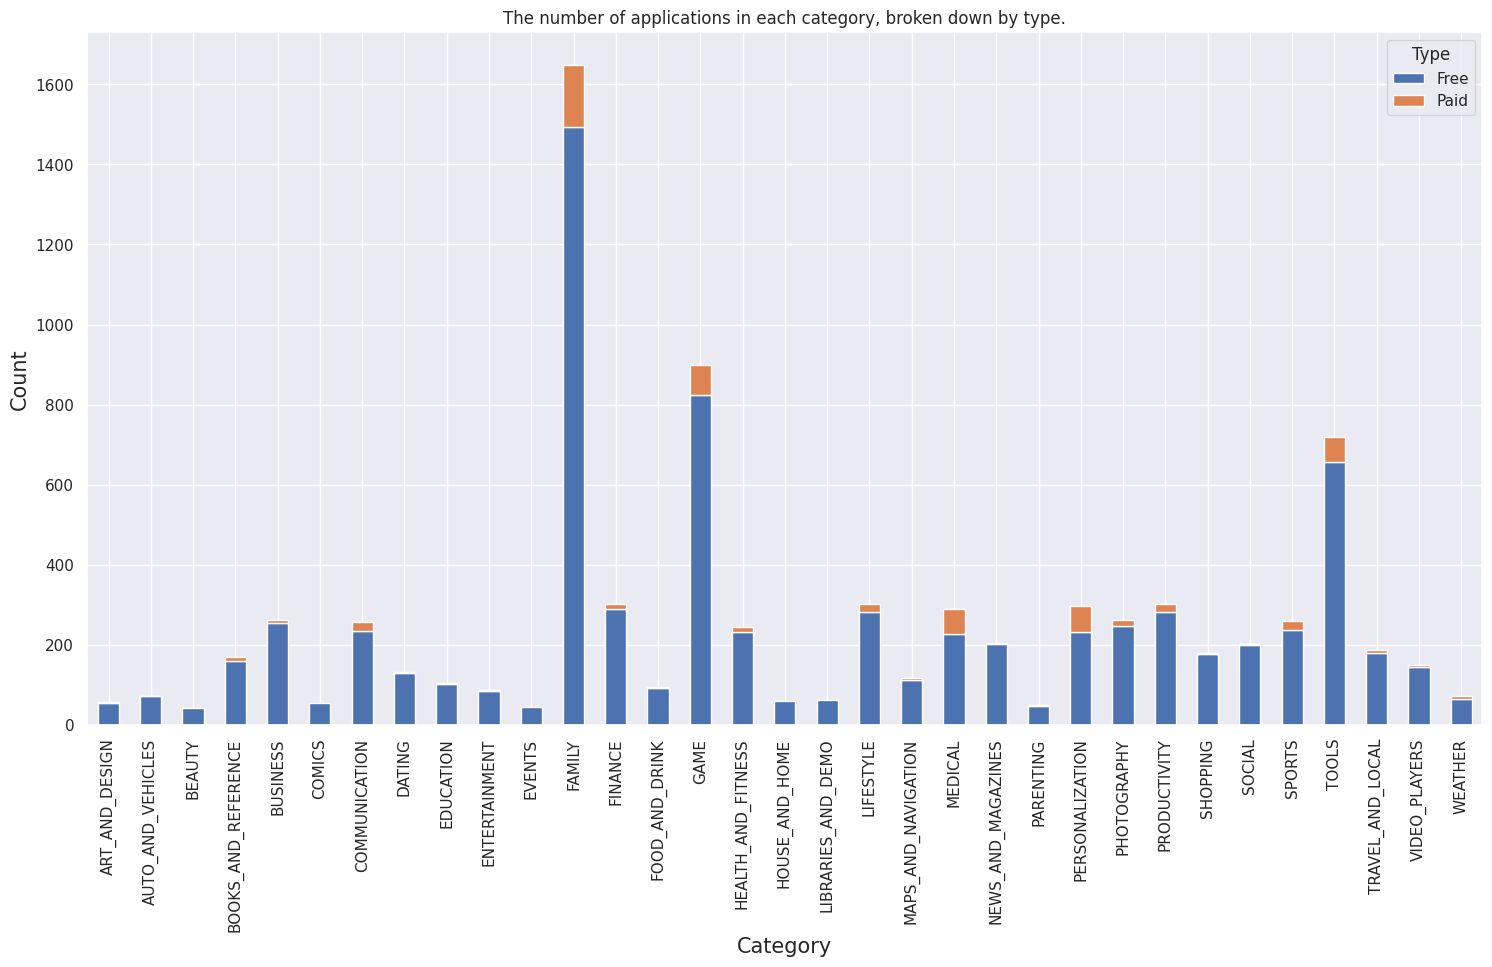

In [ ]:
count_of_apps = data1_1.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})
count_of_apps_data1_1 = count_of_apps.pivot('Category', 'Type', 'Count').fillna(0).reset_index()
count_of_apps_data1_1.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("The number of applications in each category, broken down by type.")
plt.show()

**It appears that some app categories have more free apps to download than others. The majority of apps in the Family, Food & Drink, Tools, and Social categories in our sample were free to download. At the same time, the categories of Family, Sports, Tools, and Medical had the most paid apps accessible for download.**

# How many apps were installed according to its type?

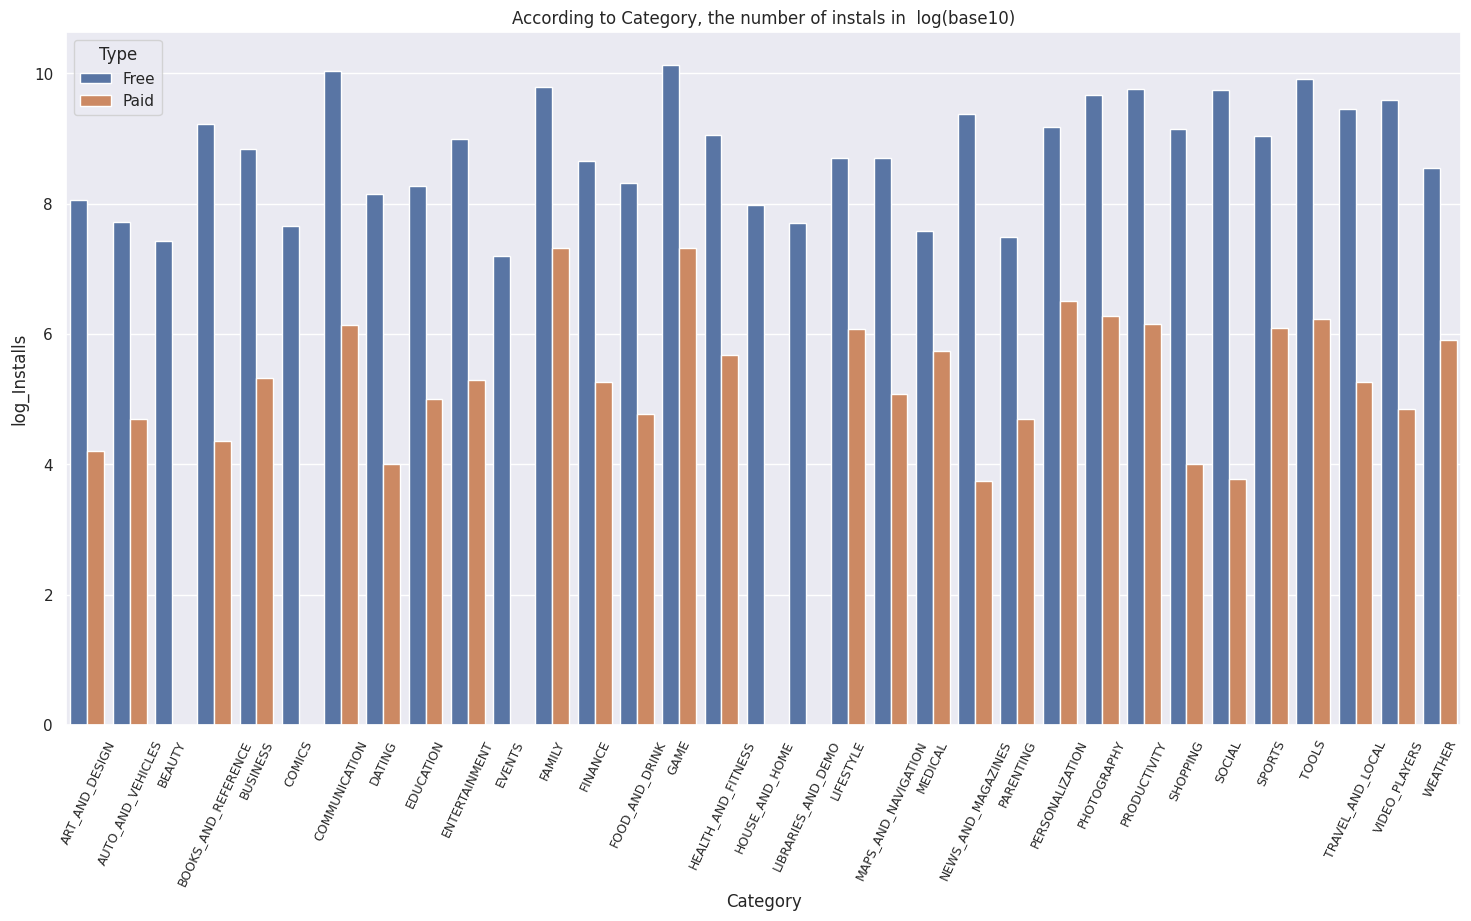

In [ ]:
data1_1['Gaming Apps'] = data1_1['Category']=='GAME'
install_by_cat = data1_1.groupby(['Category','Type'])[['Installs']].sum().reset_index()
install_by_cat['log_Installs'] = np.log10(install_by_cat['Installs'])
plt.figure(figsize=(18,9))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs(base10)")
plt.title("According to Category, the number of instals in  log(base10)")
sns.barplot(x = install_by_cat.Category, y = install_by_cat.log_Installs, hue = install_by_cat.Type);
plt.show()

**It can be concluded that the number of free programmes installed by users is more than the number of paid applications.**

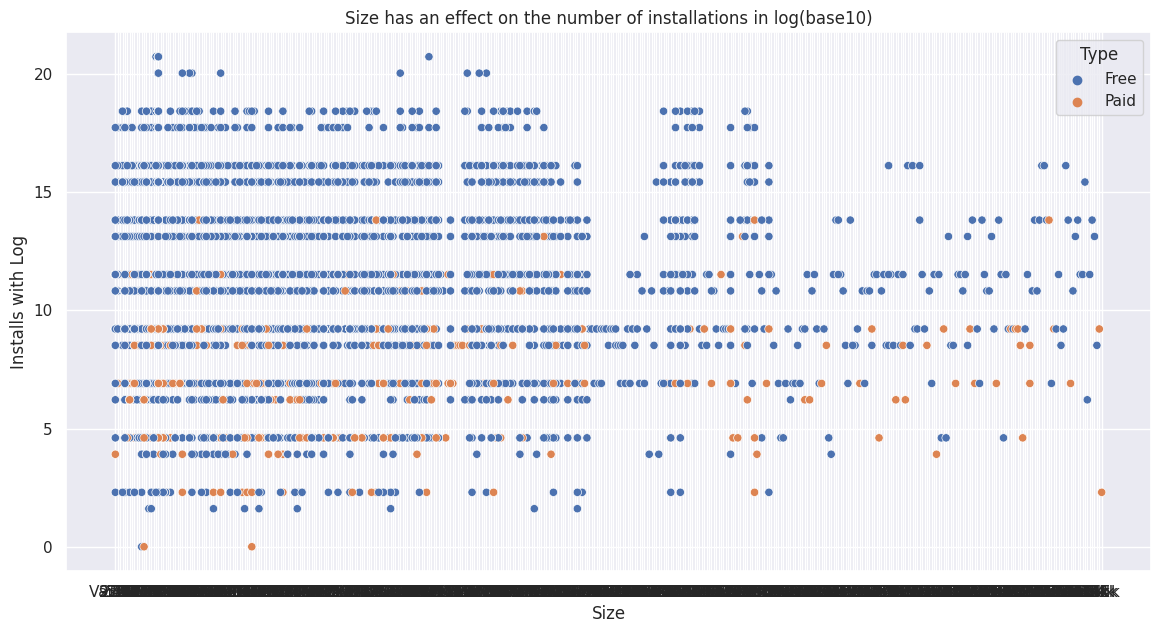

In [ ]:
plt.figure(figsize=(14,7))
plt.title("Size has an effect on the number of installations in log(base10)")
sns.scatterplot(x = data1_1['Size'], y = data1_1['Installs with Log'], hue=data1_1['Type'])
plt.show()

**The above-mentioned graphic shows how size might affect the number of installations. Users are less likely to install bulky programmes.**

# Histogram for various attributes

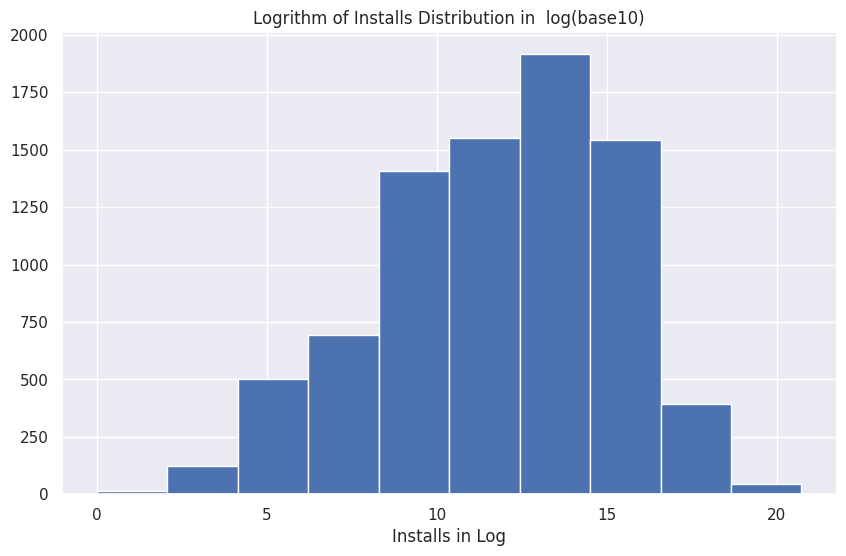

In [ ]:
data1_1.loc[data1_1['Installs with Log']==data1_1['Installs with Log'].min(),'Installs with Log']=0
plt.xlabel("Installs in Log")
plt.title("Logrithm of Installs Distribution in  log(base10)")
plt.hist(data1_1['Installs with Log']);

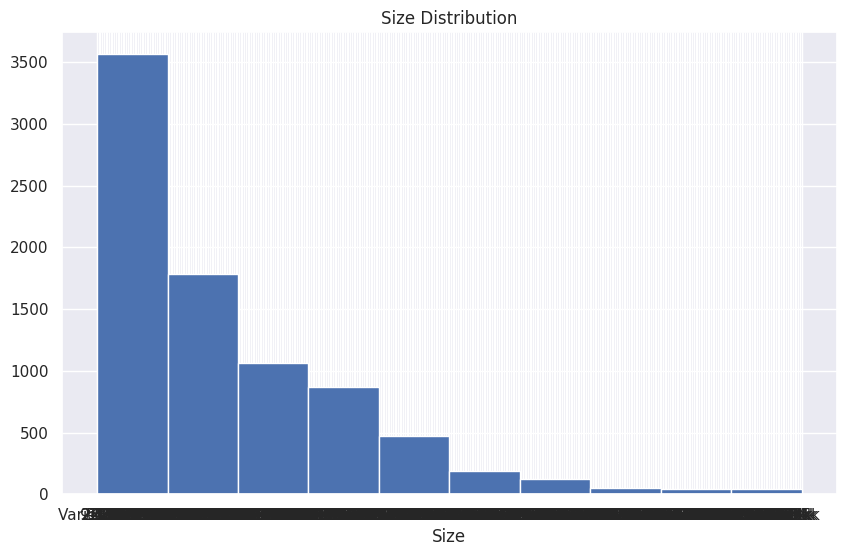

In [ ]:
plt.xlabel("Size")
plt.title("Size Distribution")
plt.hist(data1_1['Size']);
plt.show()

# Now, we will merge the second dataset with the current dataset

In [ ]:
data_merge = data1_1.merge(data2, on="App")

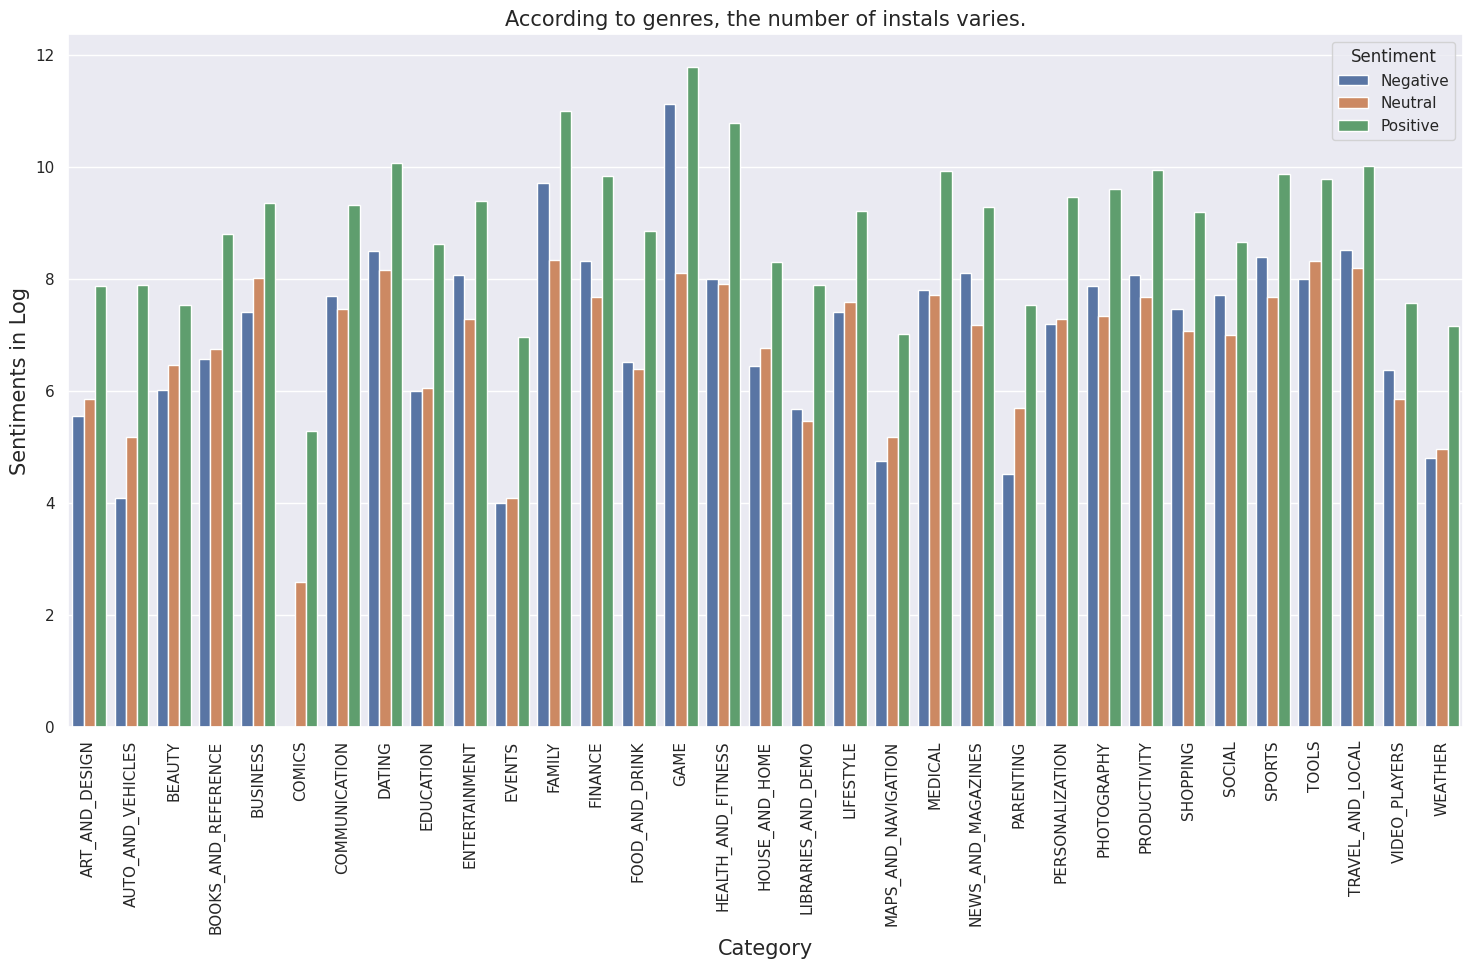

In [ ]:
sentiments = data_merge.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')
sentiments['Sentiments in Log'] = np.log2(sentiments['Sentiment Count'])
plt.figure(figsize=(18,9))
plt.xticks(rotation=90,fontsize=11)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Installs", fontsize=15)
plt.title("According to genres, the number of instals varies.",fontsize=15)
sns.barplot(x = sentiments.Category, y = sentiments['Sentiments in Log'], hue = sentiments.Sentiment);

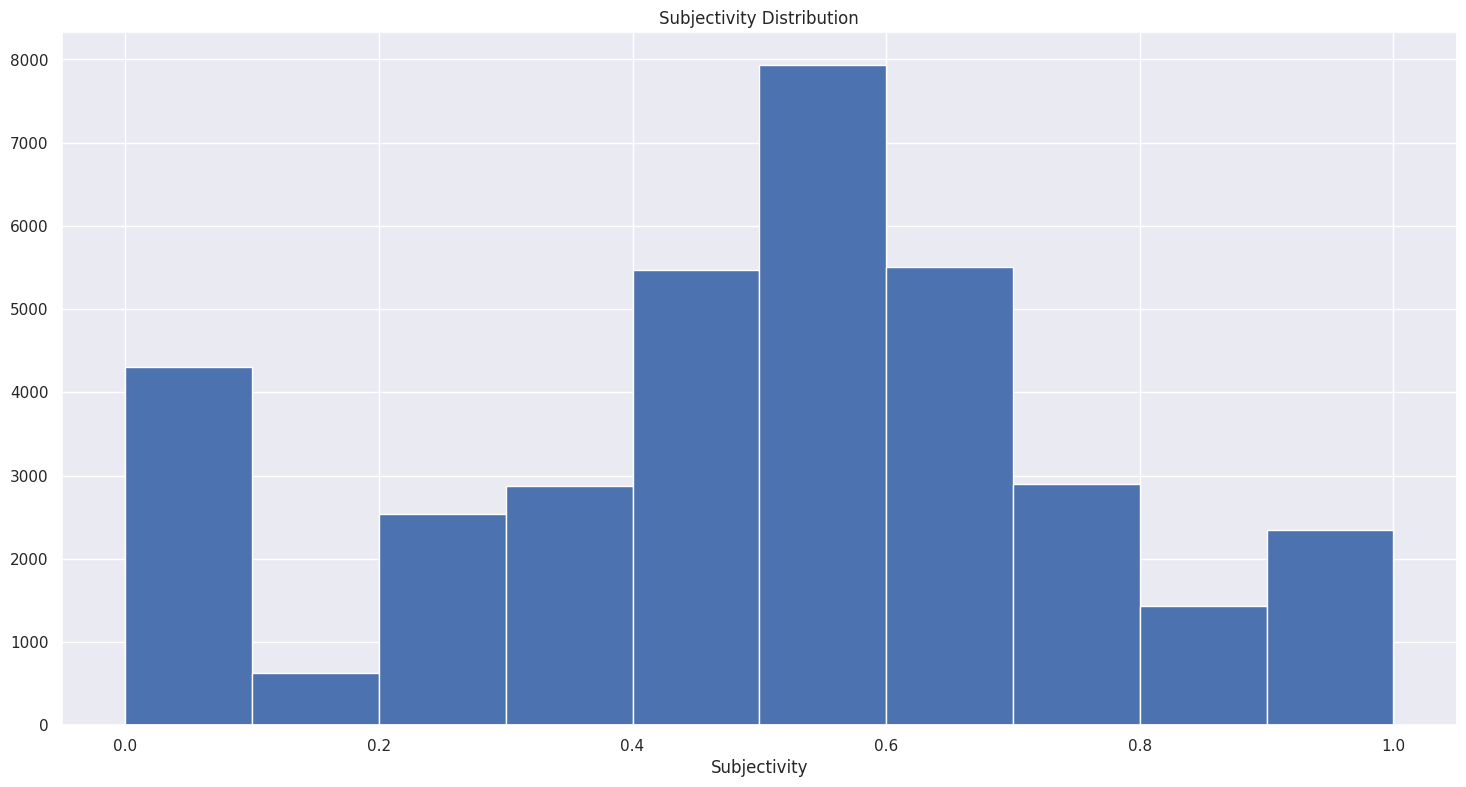

In [ ]:
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
plt.title("Subjectivity Distribution")
plt.hist(data_merge[data_merge['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

# Review Sentiments as a Percentage

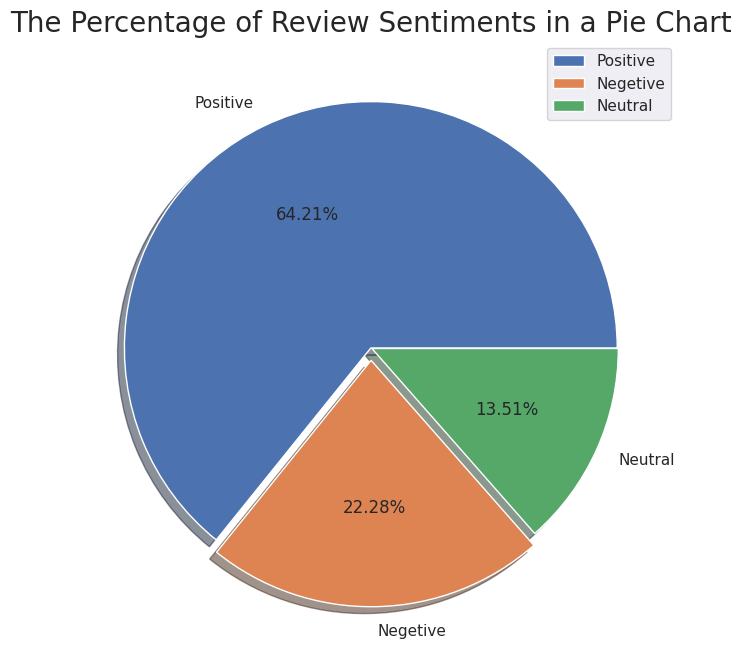

In [ ]:
import matplotlib
counting = list(data_merge['Sentiment'].value_counts())
label_names = 'Positive', 'Negetive','Neutral'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 8)
plt.pie(counting, labels=label_names, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('The Percentage of Review Sentiments in a Pie Chart', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df = data1

In [ ]:
CategoryString = df["Category"]
categoryVal = df["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
df["Category_c"] = df["Category"].map(category_dict).astype(int)

In [ ]:
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None
df["Size"] = df["Size"].map(change_size)
df.Size.fillna(method = 'ffill', inplace = True)

In [ ]:
df = df.dropna()

In [ ]:
df['Installs'] = df['Installs'].map(lambda x: x.rstrip('+'))

<ipython-input-171-b2d444d3ea5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'] = df['Installs'].map(lambda x: x.rstrip('+'))


In [ ]:
df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',',''))

<ipython-input-172-c0945f5d07f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',',''))


In [ ]:
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

df['Type'] = df['Type'].map(type_cat)

<ipython-input-173-ac8a0ff8cc66>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = df['Type'].map(type_cat)


In [ ]:
RatingL = df['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
df['Content Rating'] = df['Content Rating'].map(RatingDict).astype(int)

<ipython-input-174-72bcc11c3928>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Content Rating'] = df['Content Rating'].map(RatingDict).astype(int)


In [ ]:
df.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)

<ipython-input-175-aaaf648a487e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)


In [ ]:
GenresL = df.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
df['Genres_c'] = df['Genres'].map(GenresDict).astype(int)

<ipython-input-176-7b042f403d53>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Genres_c'] = df['Genres'].map(GenresDict).astype(int)


In [ ]:
def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price

df['Price'] = df['Price'].map(price_clean).astype(float)

<ipython-input-177-7137cf447022>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].map(price_clean).astype(float)


In [ ]:
df['Reviews'] = df['Reviews'].astype(int)

<ipython-input-178-a769f17d7fea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reviews'] = df['Reviews'].astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9360 non-null   object 
 1   Rating          9360 non-null   float64
 2   Reviews         9360 non-null   int64  
 3   Size            9360 non-null   float64
 4   Installs        9360 non-null   int64  
 5   Type            9360 non-null   int64  
 6   Price           9360 non-null   float64
 7   Content Rating  9360 non-null   int64  
 8   Genres          9360 non-null   object 
 9   Category_c      9360 non-null   int64  
 10  Genres_c        9360 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 877.5+ KB


In [ ]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genres_c
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2


In [ ]:
df2 = pd.get_dummies(df, columns=['Category'])

In [ ]:
df2.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genres_c,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def Evaluationmatrix(y_true, y_predict):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_true,y_predict)))
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_true,y_predict)))
    print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_true,y_predict)))

In [ ]:
def Evaluationmatrix_dict(y_true, y_predict, name = 'Linear - Integer'):
    dict_matrix = {}
    dict_matrix['Series Name'] = name
    dict_matrix['Mean Squared Error'] = metrics.mean_squared_error(y_true,y_predict)
    dict_matrix['Mean Absolute Error'] = metrics.mean_absolute_error(y_true,y_predict)
    dict_matrix['Mean Squared Log Error'] = metrics.mean_squared_log_error(y_true,y_predict)
    return dict_matrix

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random

X = df.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model3 = RandomForestRegressor()
model3.fit(X_train,y_train)
Results3 = model3.predict(X_test)

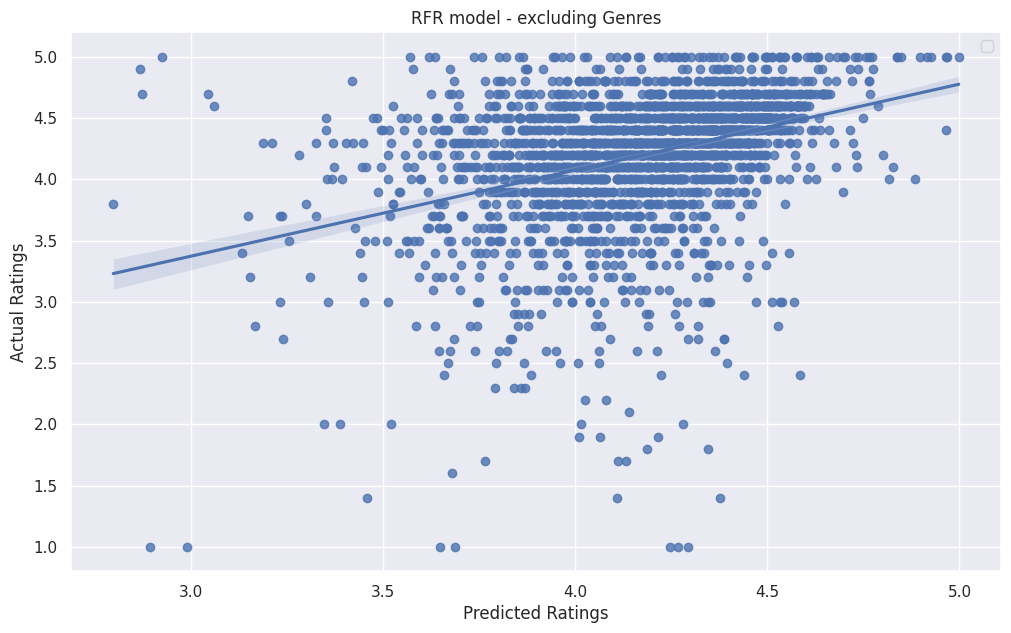

In [ ]:
plt.figure(figsize=(12,7))
sns.regplot(x = Results3, y = y_test)
plt.legend()
plt.title('RFR model - excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [ ]:
Evaluationmatrix(y_test, Results3)

Mean Squared Error: 0.2406593844651195
Mean absolute Error: 0.3233065586419752
Mean squared Log Error: 0.012135782454623937


<Figure size 1400x1000 with 0 Axes>

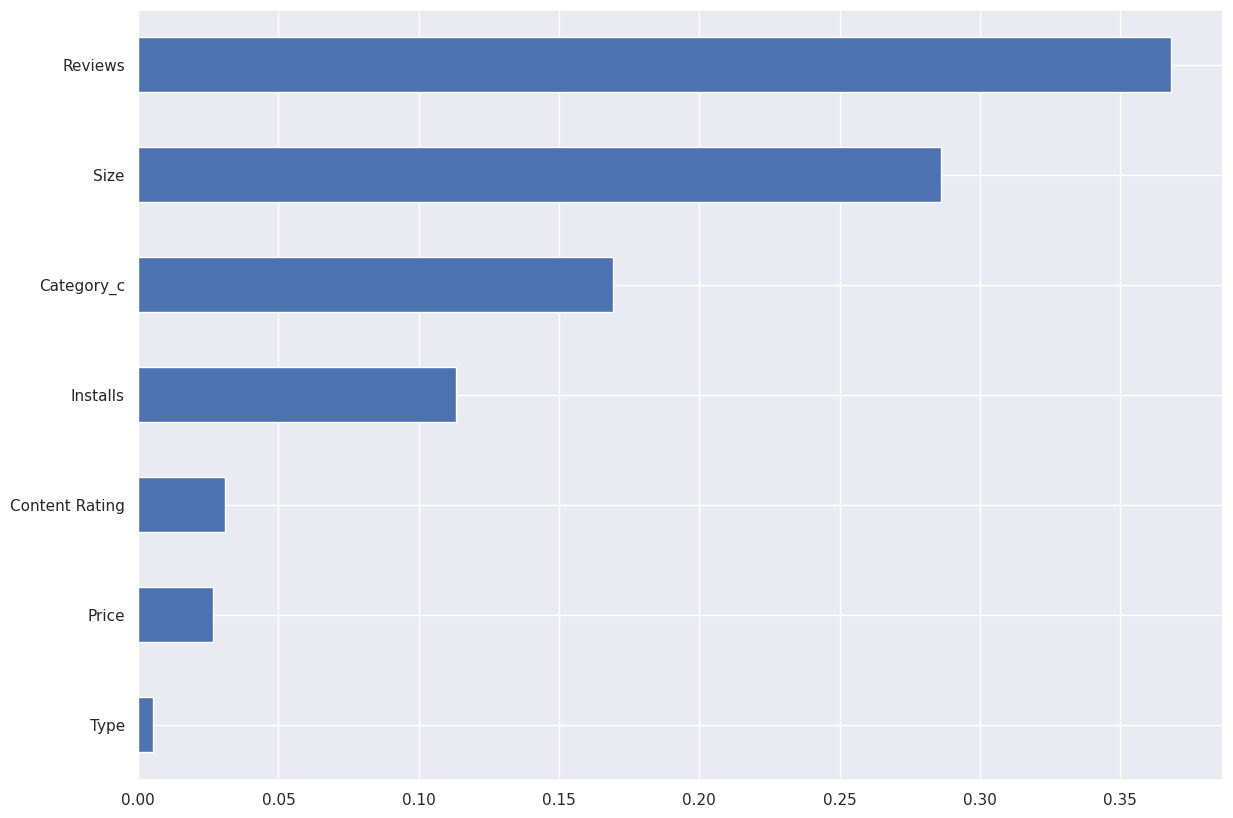

In [ ]:
Feat_impt = {}
for col,feat in zip(X.columns,model3.feature_importances_):
    Feat_impt[col] = feat

Feat_impt_df = pd.DataFrame.from_dict(Feat_impt,orient = 'index')
Feat_impt_df.sort_values(by = 0, inplace = True)
Feat_impt_df.rename(index = str, columns = {0:'Pct'},inplace = True)

plt.figure(figsize= (14,10))
Feat_impt_df.plot(kind = 'barh',figsize= (14,10),legend = False)
plt.show()

<Figure size 1400x1000 with 0 Axes>

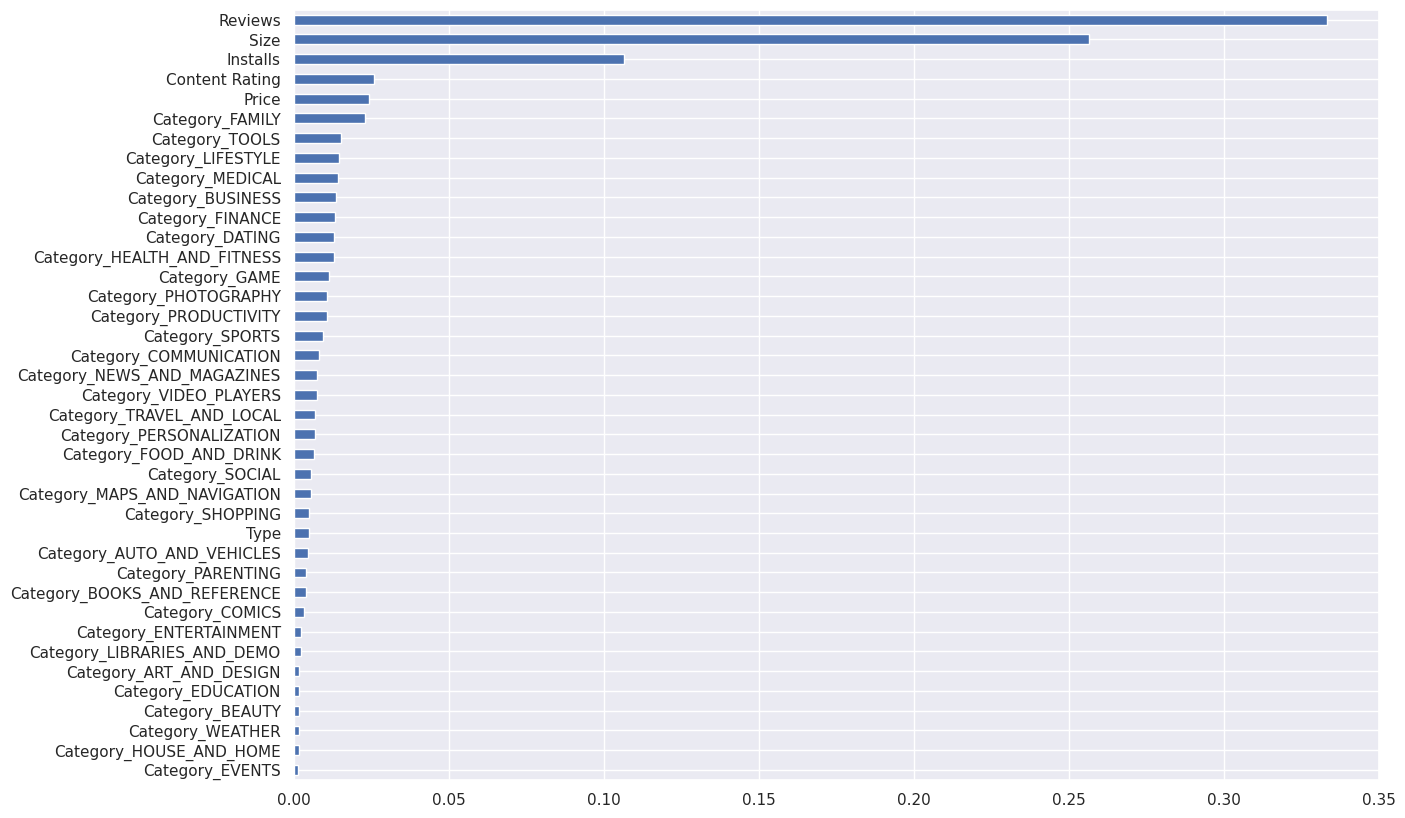

In [ ]:
Feat_impt_d = {}
for col,feat in zip(X_d.columns,model3_d.feature_importances_):
    Feat_impt_d[col] = feat

Feat_impt_df_d = pd.DataFrame.from_dict(Feat_impt_d,orient = 'index')
Feat_impt_df_d.sort_values(by = 0, inplace = True)
Feat_impt_df_d.rename(index = str, columns = {0:'Pct'},inplace = True)

plt.figure(figsize= (14,10))
Feat_impt_df_d.plot(kind = 'barh',figsize= (14,10),legend = False)
plt.show()

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Mining Project Component/Datasets/googleplaystore.csv")

In [ ]:
df.isna().sum()
df = df.dropna()

In [ ]:
df=df.drop(columns=['App','Last Updated','Current Ver','Android Ver'],axis=1)
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [ ]:
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None
df["Size"] = df["Size"].map(change_size)
df.Size.fillna(method = 'ffill', inplace = True)

In [ ]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [ ]:
df = df.dropna()
df['Installs'] = df['Installs'].map(lambda x: x.rstrip('+'))
df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',',''))

In [ ]:
#Label-encoding 
#for easy application of classification algorithms
from sklearn.preprocessing import LabelEncoder
labelen = LabelEncoder()

In [ ]:
df['Category'] = labelen.fit_transform(df['Category']) 

In [ ]:
labelen.classes_

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY',
       'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS',
       'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
       'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER'], dtype=object)

In [ ]:
df['Type'] = labelen.fit_transform(df['Type'])

In [ ]:
labelen.classes_

array(['Free', 'Paid'], dtype=object)

In [ ]:
df['Content Rating'] = labelen.fit_transform(df['Content Rating'])

In [ ]:
labelen.classes_

array(['Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+',
       'Teen', 'Unrated'], dtype=object)

In [ ]:
df['Genres'] = labelen.fit_transform(df['Genres'])

In [ ]:
labelen.classes_

array(['Action', 'Action;Action & Adventure', 'Adventure',
       'Adventure;Action & Adventure', 'Adventure;Brain Games',
       'Adventure;Education', 'Arcade', 'Arcade;Action & Adventure',
       'Arcade;Pretend Play', 'Art & Design', 'Art & Design;Creativity',
       'Art & Design;Pretend Play', 'Auto & Vehicles', 'Beauty', 'Board',
       'Board;Action & Adventure', 'Board;Brain Games',
       'Board;Pretend Play', 'Books & Reference',
       'Books & Reference;Education', 'Business', 'Card',
       'Card;Action & Adventure', 'Card;Brain Games', 'Casino', 'Casual',
       'Casual;Action & Adventure', 'Casual;Brain Games',
       'Casual;Creativity', 'Casual;Education', 'Casual;Music & Video',
       'Casual;Pretend Play', 'Comics', 'Comics;Creativity',
       'Communication', 'Communication;Creativity', 'Dating', 'Education',
       'Education;Action & Adventure', 'Education;Brain Games',
       'Education;Creativity', 'Education;Education',
       'Education;Music & Video', 'Educ

In [ ]:
def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price

df['Price'] = df['Price'].map(price_clean).astype(float)

In [ ]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.1,159,19000000.0,10000,0,0.0,1,9
1,0,3.9,967,14000000.0,500000,0,0.0,1,11
2,0,4.7,87510,8700000.0,5000000,0,0.0,1,9
3,0,4.5,215644,25000000.0,50000000,0,0.0,4,9
4,0,4.3,967,2800000.0,100000,0,0.0,1,10
...,...,...,...,...,...,...,...,...,...
10834,11,4.0,7,2600000.0,500,0,0.0,1,37
10836,11,4.5,38,53000000.0,5000,0,0.0,1,37
10837,11,5.0,4,3600000.0,100,0,0.0,1,37
10839,3,4.5,114,3600000.0,1000,0,0.0,3,18


In [ ]:
# Importing Important Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
df_scaled = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(df_scaled,columns=['Category', 'Rating', 'Reviews', 'Size', 'Installs',
                                          'Type', 'Price', 'Content Rating', 'Genres'])
DF = df_scaled.to_numpy()
df_scaled

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,-2.029946,-0.178244,-0.163511,-0.178260,-0.196126,-0.272048,-0.06076,-0.477791,-1.648298
1,-2.029946,-0.566416,-0.163254,-0.393370,-0.190757,-0.272048,-0.06076,-0.477791,-1.586438
2,-2.029946,0.986272,-0.135735,-0.621387,-0.141448,-0.272048,-0.06076,-0.477791,-1.648298
3,-2.029946,0.598100,-0.094991,0.079872,0.351641,-0.272048,-0.06076,2.456672,-1.648298
4,-2.029946,0.209928,-0.163254,-0.875217,-0.195140,-0.272048,-0.06076,-0.477791,-1.617368
...,...,...,...,...,...,...,...,...,...
9355,-0.700773,-0.372330,-0.163559,-0.883822,-0.196230,-0.272048,-0.06076,-0.477791,-0.782246
9356,-0.700773,0.598100,-0.163549,1.284489,-0.196181,-0.272048,-0.06076,-0.477791,-0.782246
9357,-0.700773,1.568530,-0.163560,-0.840800,-0.196234,-0.272048,-0.06076,-0.477791,-0.782246
9358,-1.667444,0.598100,-0.163525,-0.840800,-0.196225,-0.272048,-0.06076,1.478518,-1.369924


In [ ]:
wcss = []
for i in range(2,9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

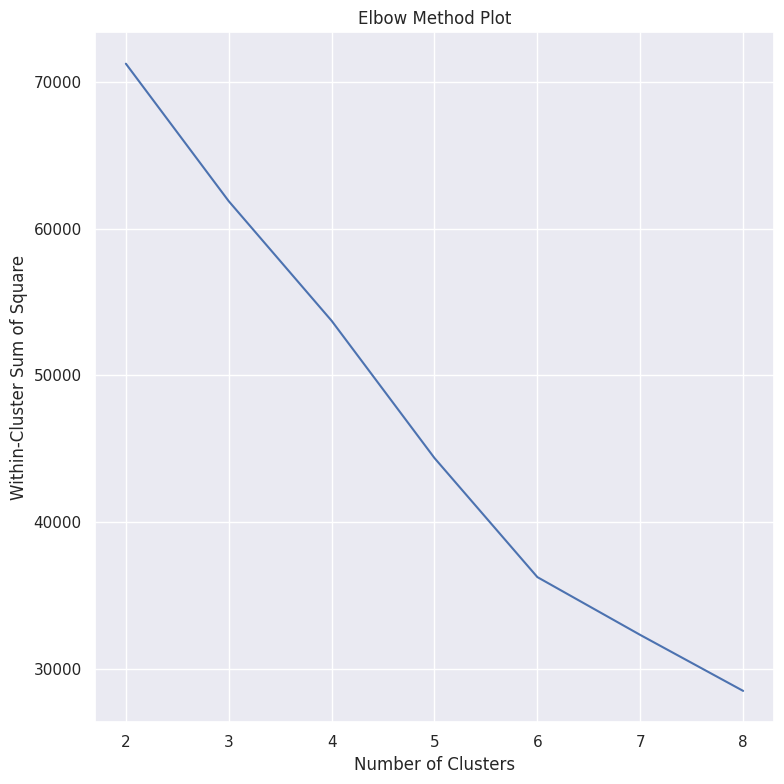

In [ ]:
plt.plot(range(2,9),wcss)
plt.title('Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Square') # Within cluster sum of squares
plt.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 42)
kmeans.fit(df_scaled)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [ ]:
y = kmeans.predict(df_scaled)
y_df = pd.DataFrame(y,columns=['Segment'])

In [ ]:
final_data = pd.concat([df,y_df],axis=1) 
final_data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Segment
0,0.0,4.1,159,19000000.0,10000.0,0.0,0.0,1.0,9.0,2.0
1,0.0,3.9,967,14000000.0,500000.0,0.0,0.0,1.0,11.0,2.0
2,0.0,4.7,87510,8700000.0,5000000.0,0.0,0.0,1.0,9.0,2.0
3,0.0,4.5,215644,25000000.0,50000000.0,0.0,0.0,4.0,9.0,4.0
4,0.0,4.3,967,2800000.0,100000.0,0.0,0.0,1.0,10.0,2.0


In [ ]:
cluster_titles = np.array(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6'])
cluster_num_titles = kmeans.labels_
cluster_num_titles_new = []
for i in cluster_num_titles:
  if i == 0:
    cluster_num_titles_new.append(cluster_titles[0])
  if i == 1:
    cluster_num_titles_new.append(cluster_titles[1])
  if i == 2:
    cluster_num_titles_new.append(cluster_titles[2])
  if i == 3:
    cluster_num_titles_new.append(cluster_titles[3])
  if i == 4:
    cluster_num_titles_new.append(cluster_titles[4])
  if i == 5:
    cluster_num_titles_new.append(cluster_titles[5])

In [ ]:
sns.set(rc={'figure.figsize':(6, 5)})

<Axes: xlabel='Category', ylabel='Reviews'>

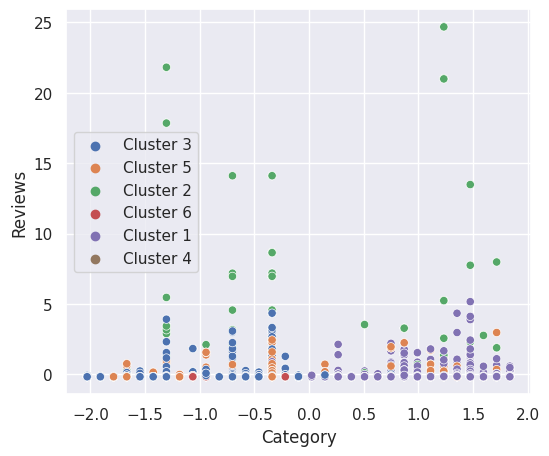

In [ ]:
sns.scatterplot(data=df_scaled, x='Category', y='Reviews', hue=cluster_num_titles_new)

<Axes: xlabel='Category', ylabel='Reviews'>

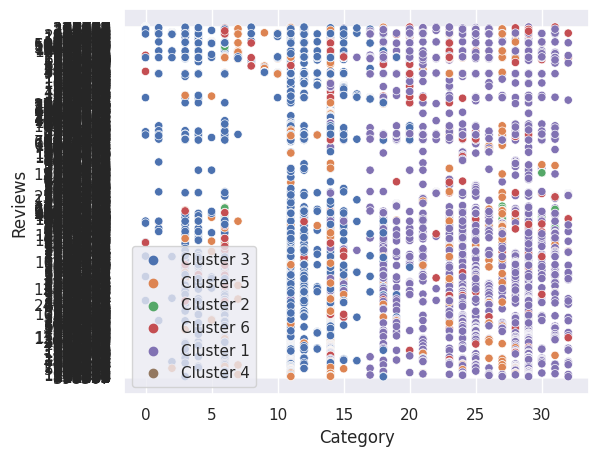

In [ ]:
sns.scatterplot(data=df, x='Category', y='Reviews', hue=cluster_num_titles_new)

In [ ]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.1,159,19000000.0,10000,0,0.0,1,9
1,0,3.9,967,14000000.0,500000,0,0.0,1,11
2,0,4.7,87510,8700000.0,5000000,0,0.0,1,9
3,0,4.5,215644,25000000.0,50000000,0,0.0,4,9
4,0,4.3,967,2800000.0,100000,0,0.0,1,10


<Axes: xlabel='Category', ylabel='Installs'>

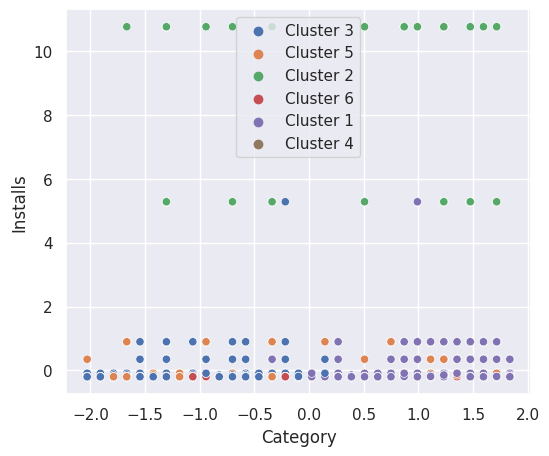

In [ ]:
sns.scatterplot(data=df_scaled, x='Category', y='Installs', hue=cluster_num_titles_new)

<Axes: xlabel='Category', ylabel='Installs'>

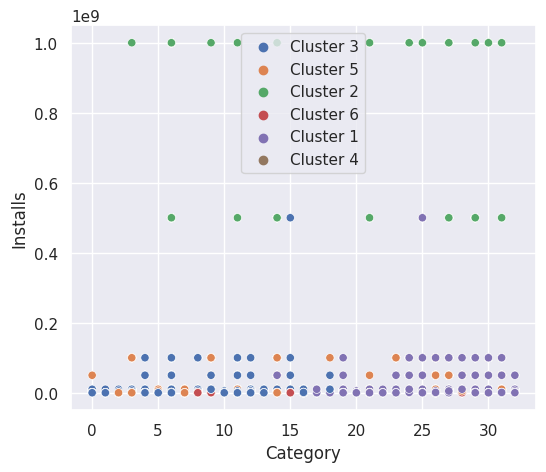

In [ ]:
sns.scatterplot(data=df, x='Category', y='Installs', hue=cluster_num_titles_new)

<Axes: xlabel='Category', ylabel='Size'>

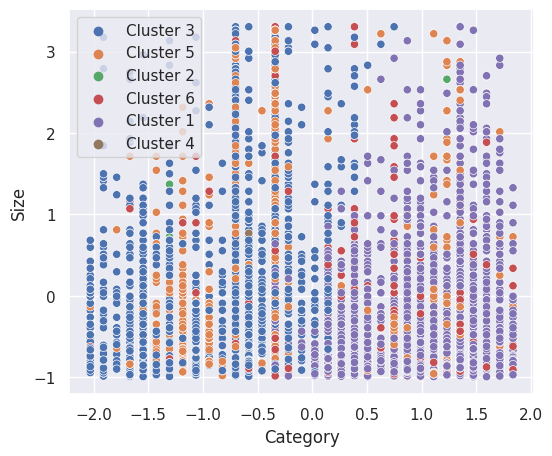

In [ ]:
sns.scatterplot(data=df_scaled, x='Category', y='Size', hue=cluster_num_titles_new)

<Axes: xlabel='Category', ylabel='Size'>

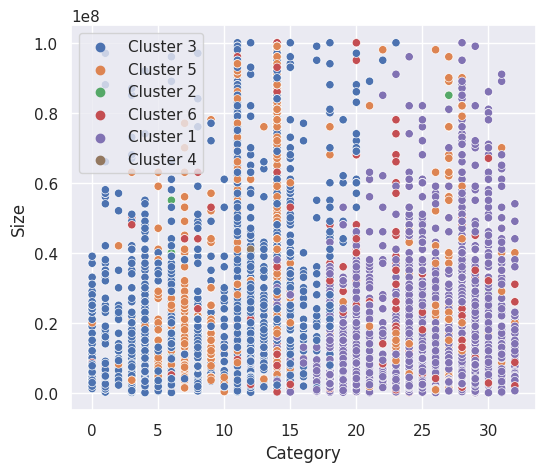

In [ ]:
sns.scatterplot(data=df, x='Category', y='Size', hue=cluster_num_titles_new)

<Axes: xlabel='Category', ylabel='Content Rating'>

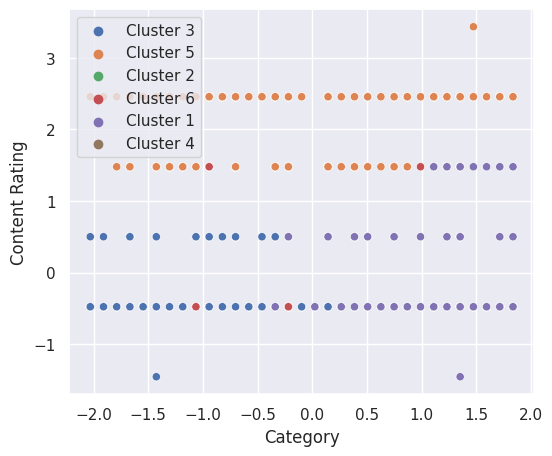

In [ ]:
sns.scatterplot(data=df_scaled, x='Category', y='Content Rating', hue=cluster_num_titles_new)

<Axes: xlabel='Category', ylabel='Content Rating'>

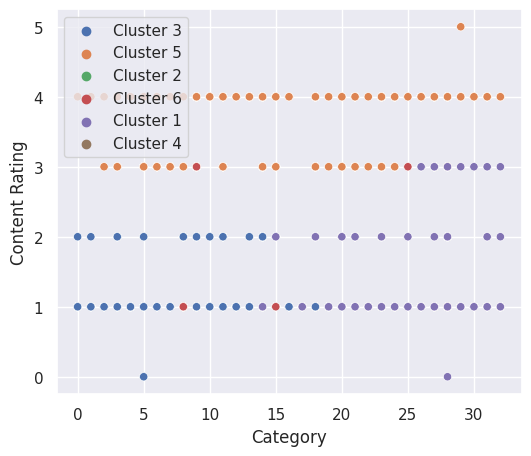

In [ ]:
sns.scatterplot(data=df, x='Category', y='Content Rating', hue=cluster_num_titles_new)

<Axes: xlabel='Category', ylabel='Rating'>

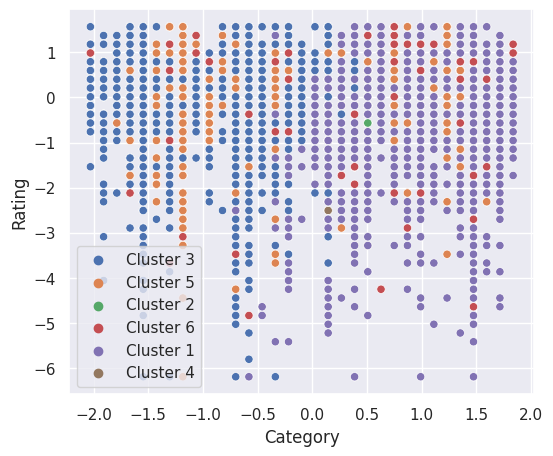

In [ ]:
sns.scatterplot(data=df_scaled, x='Category', y='Rating', hue=cluster_num_titles_new)

<Axes: xlabel='Category', ylabel='Rating'>

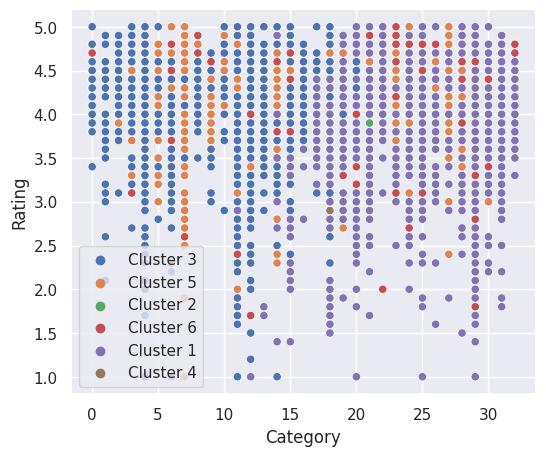

In [ ]:
sns.scatterplot(data=df, x='Category', y='Rating', hue=cluster_num_titles_new)